### 의사결정나무

#### dataset : wine

In [34]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. metrics import accuracy_score

# 데이터 불러오기
wine = load_wine()
X = wine.data
y = wine.target

# 학습 데이터와 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuacy :", accuracy)

Accuacy : 0.9444444444444444


Best Parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy : 0.9722222222222222


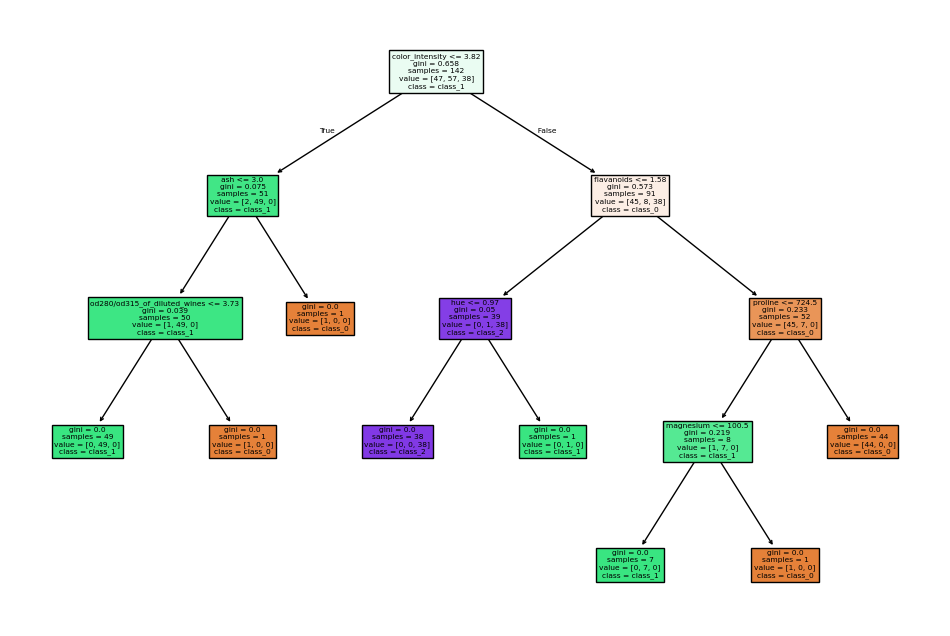

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import plot_tree

# 탐색할 파라미터 그리드 설정
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,5,7],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,3,5]
}

# GridSearchCV를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적 파라미터 확인
best_params = grid_search.best_params_
print("Best Parameters :", best_params)

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

# 트리 구조 시각화
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

#### dataset : iris

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 분류기 생성 및 학습
model2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                class_weight=None, ccp_alpha=0.0
                                )

model2.fit(X_train, y_train)

# 예측
y_pred = model2.predict(X_test)

# 평가
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :", accuracy)

Accuracy : 1.0


best param :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy : 1.0


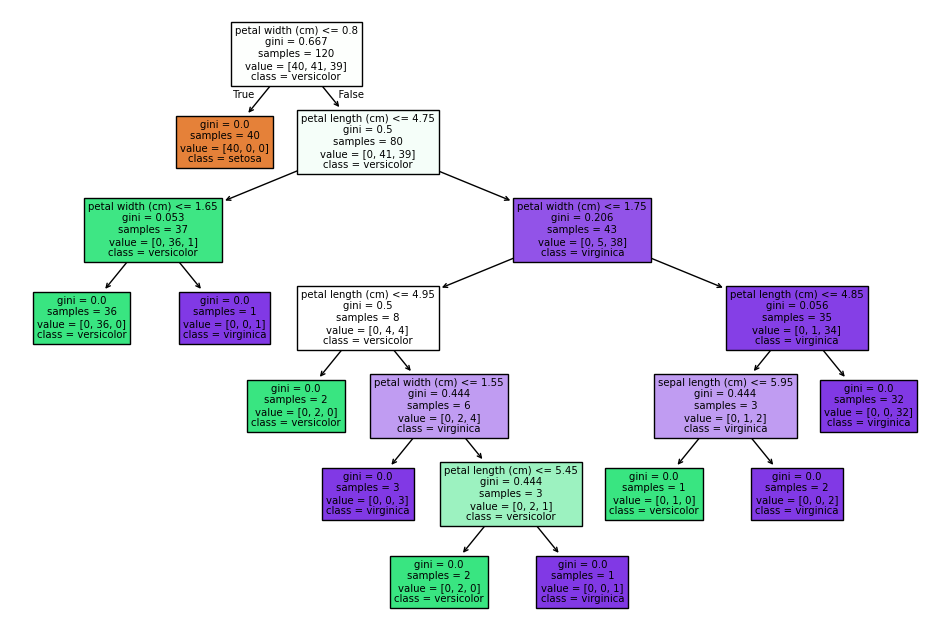

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import plot_tree

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,5,7],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,3,5]
}

# GridSearchCV를 사용하여 최적 파라미터 탐색
grid_search = GridSearchCV(model2, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적 파라미터
best_params = grid_search.best_params_
print("best param : ", best_params)

# 최적 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

# 트리 구조 시각화
plt.figure(figsize=(12,8))
plot_tree(model2, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

#### dataset : california_housing

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regression 모델 생성 및 학습
model3 = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :", mse)

Mean Squared Error : 0.5245146178314735


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import plot_tree

param_grid = {
    'max_depth' : [3,5,7],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,3,5]
}

grid_search = GridSearchCV(model3, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("best param :", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("mse :", mse)

best param : {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
mse : 0.4565775985938209
